In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
import numpy as np
import pandas as pd
import cv2  # OpenCVライブラリ
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import glob
import os
import sys
import pathlib
from pathlib import Path

In [4]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent

In [5]:
import fluid_intake_estimate
from fluid_intake_estimate import variable_data_set
from fluid_intake_estimate import lstm

/home/s2/Desktop/washino/swallowing
/home/s2/Desktop/washino/swallowing


In [6]:
directory_path = parent_dir / 'dataset'

In [16]:
names = ['washino', 'haruki', 'ezumi', 'hikaru', 'ibuki', 'kanata', 'kazuki', 'kishimoto', 'kosasayama', 'mocchi', 'nakaryo', 'ruku', 'shibata', 'soichiro', 'tsuji']
data = variable_data_set.VariableDataSet(786, scale=1, time_range = 20000)

count = 0

for name in names:    
    path = directory_path / name
    wav_files = glob.glob(os.path.join(path, '*.wav'))
    wav_file_count = len(wav_files)    
    
    csv_path = path / f'{name}.csv'    
    data.csv_to_dataset(path, csv_path, count, signal_processing='No')
    count += wav_file_count
    print(count)

352
382
413
444
474
504
538
571
601
631
661
694
724
755
786


In [17]:
# 分割交差検証の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# データを保持するためのリスト
train_data_splits_index = []
test_data_splits_index = []

# データのインデックスを分割
for train_index, test_index in kf.split(data.X):
    train_data_splits_index.append(train_index)
    test_data_splits_index.append(test_index)

In [18]:
y = []
predict = []

In [20]:
model = lstm.LSTMmodel(scale = 1, time_range = 20000)

model_checkpoint = ModelCheckpoint(
    filepath='no_lstm_20240610_model_best_0.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)


use_data = 0
print(data.X.shape)
model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 15, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('no_lstm_20240610_model_0.keras')

(786, 20000, 1)
Epoch 1/15
18/18 [==============================] - 2273s 126s/step - loss: 0.1938 - mean_absolute_error: 0.3632 - mean_squared_error: 0.1938 - val_loss: 0.0838 - val_mean_absolute_error: 0.2433 - val_mean_squared_error: 0.0838
Epoch 2/15
18/18 [==============================] - 2235s 124s/step - loss: 0.0898 - mean_absolute_error: 0.2607 - mean_squared_error: 0.0898 - val_loss: 0.0758 - val_mean_absolute_error: 0.2329 - val_mean_squared_error: 0.0758
Epoch 3/15
18/18 [==============================] - 2249s 125s/step - loss: 0.0873 - mean_absolute_error: 0.2570 - mean_squared_error: 0.0873 - val_loss: 0.0713 - val_mean_absolute_error: 0.2257 - val_mean_squared_error: 0.0713
Epoch 4/15
18/18 [==============================] - 2261s 126s/step - loss: 0.0874 - mean_absolute_error: 0.2573 - mean_squared_error: 0.0874 - val_loss: 0.0702 - val_mean_absolute_error: 0.2232 - val_mean_squared_error: 0.0702
Epoch 5/15
18/18 [==============================] - 2280s 127s/step - lo

In [21]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [22]:
model = lstm.LSTMmodel(scale = 1, time_range = 20000)

model_checkpoint = ModelCheckpoint(
    filepath='no_lstm_20240610_model_best_1.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)


use_data = 1
print(data.X.shape)
model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 15, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('no_lstm_20240610_model_1.keras')

(786, 20000, 1)
Epoch 1/15
18/18 [==============================] - 2284s 126s/step - loss: 0.1488 - mean_absolute_error: 0.3142 - mean_squared_error: 0.1488 - val_loss: 0.0834 - val_mean_absolute_error: 0.2497 - val_mean_squared_error: 0.0834
Epoch 2/15
18/18 [==============================] - 2310s 128s/step - loss: 0.0833 - mean_absolute_error: 0.2472 - mean_squared_error: 0.0833 - val_loss: 0.0780 - val_mean_absolute_error: 0.2430 - val_mean_squared_error: 0.0780
Epoch 3/15
18/18 [==============================] - 2281s 127s/step - loss: 0.0814 - mean_absolute_error: 0.2459 - mean_squared_error: 0.0814 - val_loss: 0.0747 - val_mean_absolute_error: 0.2381 - val_mean_squared_error: 0.0747
Epoch 4/15
18/18 [==============================] - 2307s 128s/step - loss: 0.0807 - mean_absolute_error: 0.2446 - mean_squared_error: 0.0807 - val_loss: 0.0771 - val_mean_absolute_error: 0.2417 - val_mean_squared_error: 0.0771
Epoch 5/15
18/18 [==============================] - 2294s 127s/step - lo

In [23]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [24]:
model = lstm.LSTMmodel(scale = 1, time_range = 20000)

model_checkpoint = ModelCheckpoint(
    filepath='no_lstm_20240610_model_best_2.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)


use_data = 2
print(data.X.shape)
model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 15, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('no_lstm_20240610_model_2.keras')
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

(786, 20000, 1)
Epoch 1/15
18/18 [==============================] - 2299s 127s/step - loss: 0.1143 - mean_absolute_error: 0.2862 - mean_squared_error: 0.1143 - val_loss: 0.0796 - val_mean_absolute_error: 0.2433 - val_mean_squared_error: 0.0796
Epoch 2/15
18/18 [==============================] - 2258s 125s/step - loss: 0.0844 - mean_absolute_error: 0.2514 - mean_squared_error: 0.0844 - val_loss: 0.0856 - val_mean_absolute_error: 0.2530 - val_mean_squared_error: 0.0856
Epoch 3/15
18/18 [==============================] - 2273s 126s/step - loss: 0.0831 - mean_absolute_error: 0.2497 - mean_squared_error: 0.0831 - val_loss: 0.0792 - val_mean_absolute_error: 0.2422 - val_mean_squared_error: 0.0792
Epoch 4/15
18/18 [==============================] - 2315s 129s/step - loss: 0.0826 - mean_absolute_error: 0.2495 - mean_squared_error: 0.0826 - val_loss: 0.0884 - val_mean_absolute_error: 0.2571 - val_mean_squared_error: 0.0884
Epoch 5/15
18/18 [==============================] - 2278s 126s/step - lo

In [25]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [26]:
model = lstm.LSTMmodel(scale = 1, time_range = 20000)

model_checkpoint = ModelCheckpoint(
    filepath='no_lstm_20240610_model_best_3.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)


use_data = 3
print(data.X.shape)
model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 15, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('no_lstm_20240610_model_3.keras')
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

(786, 20000, 1)
Epoch 1/15
18/18 [==============================] - 2238s 124s/step - loss: 0.1531 - mean_absolute_error: 0.3192 - mean_squared_error: 0.1531 - val_loss: 0.1013 - val_mean_absolute_error: 0.2583 - val_mean_squared_error: 0.1013
Epoch 2/15
18/18 [==============================] - 2188s 121s/step - loss: 0.0905 - mean_absolute_error: 0.2551 - mean_squared_error: 0.0905 - val_loss: 0.0909 - val_mean_absolute_error: 0.2486 - val_mean_squared_error: 0.0909
Epoch 3/15
18/18 [==============================] - 2207s 123s/step - loss: 0.0849 - mean_absolute_error: 0.2465 - mean_squared_error: 0.0849 - val_loss: 0.0768 - val_mean_absolute_error: 0.2354 - val_mean_squared_error: 0.0768
Epoch 4/15
18/18 [==============================] - 2222s 124s/step - loss: 0.0821 - mean_absolute_error: 0.2451 - mean_squared_error: 0.0821 - val_loss: 0.0732 - val_mean_absolute_error: 0.2337 - val_mean_squared_error: 0.0732
Epoch 5/15
18/18 [==============================] - 2220s 123s/step - lo

In [27]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [28]:
model = lstm.LSTMmodel(scale = 1, time_range = 20000)

model_checkpoint = ModelCheckpoint(
    filepath='no_lstm_20240610_model_best_4.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)


use_data = 4
print(data.X.shape)
model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 50, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('no_lstm_20240610_model_4.keras')
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

(786, 20000, 1)
Epoch 1/50
18/18 [==============================] - 2320s 129s/step - loss: 0.1517 - mean_absolute_error: 0.3149 - mean_squared_error: 0.1517 - val_loss: 0.1106 - val_mean_absolute_error: 0.2813 - val_mean_squared_error: 0.1106
Epoch 2/50
18/18 [==============================] - 2286s 127s/step - loss: 0.0869 - mean_absolute_error: 0.2497 - mean_squared_error: 0.0869 - val_loss: 0.0880 - val_mean_absolute_error: 0.2566 - val_mean_squared_error: 0.0880
Epoch 3/50
18/18 [==============================] - 2264s 126s/step - loss: 0.0853 - mean_absolute_error: 0.2494 - mean_squared_error: 0.0853 - val_loss: 0.0820 - val_mean_absolute_error: 0.2472 - val_mean_squared_error: 0.0820
Epoch 4/50
18/18 [==============================] - 2313s 129s/step - loss: 0.0836 - mean_absolute_error: 0.2485 - mean_squared_error: 0.0836 - val_loss: 0.0816 - val_mean_absolute_error: 0.2485 - val_mean_squared_error: 0.0816
Epoch 5/50
18/18 [==============================] - 2301s 128s/step - lo

Epoch 37/50
18/18 [==============================] - 2281s 127s/step - loss: 0.0819 - mean_absolute_error: 0.2453 - mean_squared_error: 0.0819 - val_loss: 0.0815 - val_mean_absolute_error: 0.2467 - val_mean_squared_error: 0.0815
Epoch 38/50
18/18 [==============================] - 2285s 127s/step - loss: 0.0834 - mean_absolute_error: 0.2490 - mean_squared_error: 0.0834 - val_loss: 0.0816 - val_mean_absolute_error: 0.2472 - val_mean_squared_error: 0.0816
Epoch 39/50
18/18 [==============================] - 2285s 127s/step - loss: 0.0820 - mean_absolute_error: 0.2460 - mean_squared_error: 0.0820 - val_loss: 0.0837 - val_mean_absolute_error: 0.2508 - val_mean_squared_error: 0.0837
Epoch 40/50
18/18 [==============================] - 2283s 127s/step - loss: 0.0820 - mean_absolute_error: 0.2473 - mean_squared_error: 0.0820 - val_loss: 0.0848 - val_mean_absolute_error: 0.2523 - val_mean_squared_error: 0.0848
Epoch 41/50
18/18 [==============================] - 2289s 127s/step - loss: 0.0813 

In [29]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [31]:
array_y = np.concatenate(y)
array_pre = np.concatenate(predict)

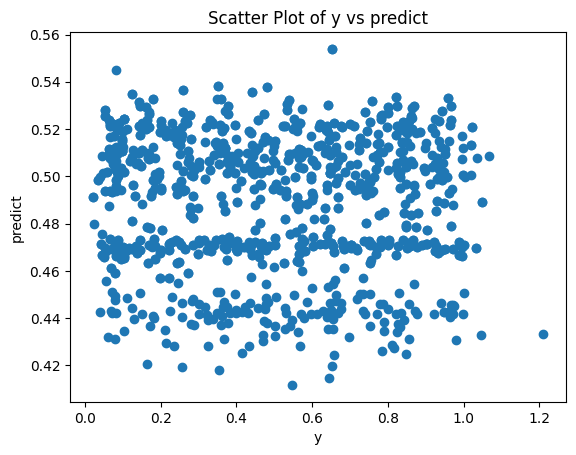

R2 Score: -0.016789693184430687
Mean Absolute Error (MAE): 0.24895640953287024
Root Mean Squared Error (RMSE): 0.288219400181854


In [32]:
plt.scatter(array_y, array_pre)
plt.xlabel('y')
plt.ylabel('predict')
plt.title('Scatter Plot of y vs predict')
plt.show()

# R2スコアの計算
r2 = r2_score(array_y, array_pre)
print(f"R2 Score: {r2}")

# MAEの計算
mae = mean_absolute_error(array_y, array_pre)
print(f"Mean Absolute Error (MAE): {mae}")

      
      # RMSEの計算
rmse = np.sqrt(mean_squared_error(array_y, array_pre))
print(f"Root Mean Squared Error (RMSE): {rmse}")